In [11]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from cosmology_calculator import cosmos_calc
import pandas as pd

%reload_ext autoreload
%autoreload 2


In [2]:
#Input parameters for our Universe
radiation=0
mass=0.3
lamb=0.7
paramters1 = [radiation,mass,lamb]

/Users/jchung1/Desktop/Uni Works/Honours/Courseworks/ASTR6002/cosmology_calculator.py:59: RuntimeWarning: invalid value encountered in sqrt
  return -1*np.sqrt(adot2) #integration is negative since t=t0-tau so dt=-dtau


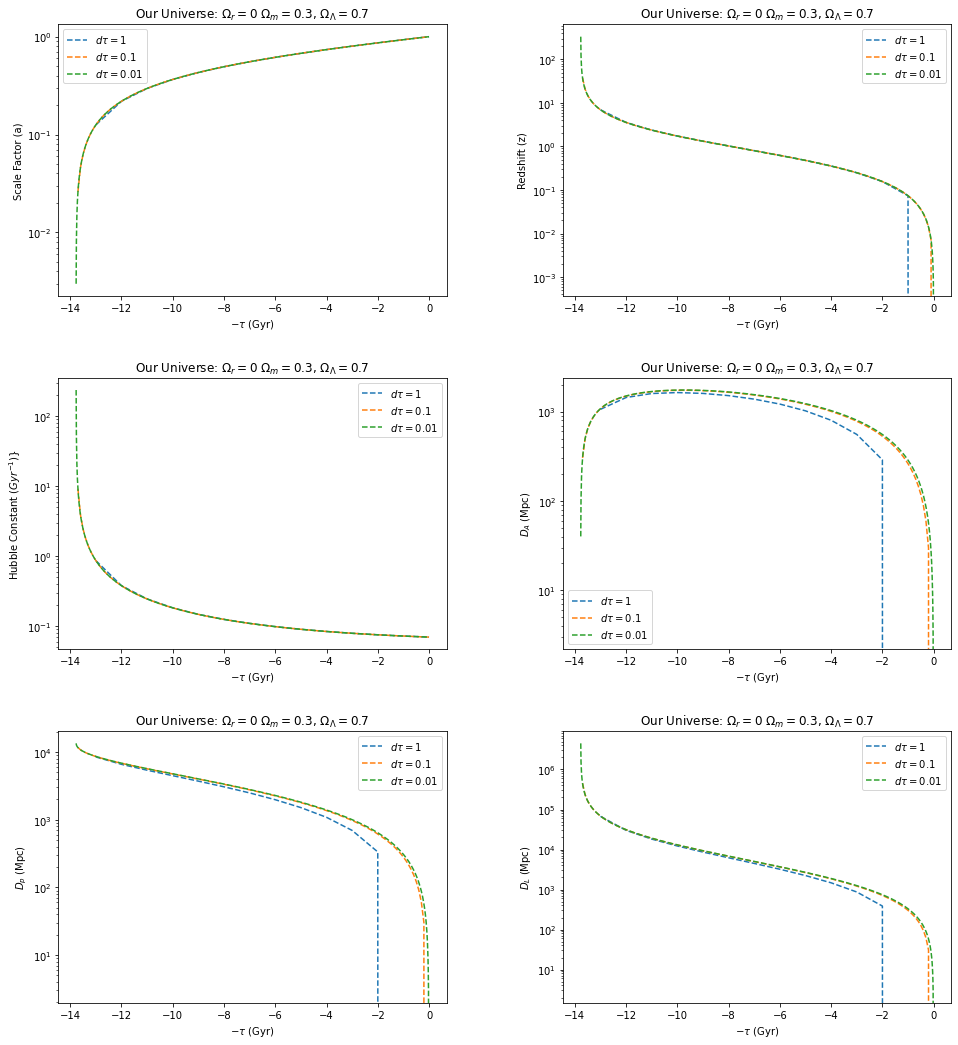

In [7]:
fig, axs = plt.subplots(3, 2,gridspec_kw={'hspace': 0.3, 'wspace': 0.3},figsize=(16, 18))

for dt in [1,0.1,0.01]:
    universe = cosmos_calc(paramters1,T_forward=0,dt=dt) #T_forward=0 because we don't care about the future for now
    axs[0, 0].plot(universe._t_axis,universe.scale_factor(),'--')
    axs[0, 1].plot(universe._t_axis,universe.z(),'--')
    axs[1, 0].plot(universe._t_axis,universe.Hubble_constant(),'--')
    axs[1, 1].plot(universe._flipped_tau,universe.D_A(),'--')
    axs[2, 0].plot(universe._flipped_tau,universe.D_proper(),'--')
    axs[2, 1].plot(universe._flipped_tau,universe.D_L(),'--')
    
ylabels = np.array([['Scale Factor (a)','Redshift (z)'],
            ['Hubble Constant ($Gyr^{-1}$)}','$D_A$ (Mpc)'],
            ['$D_p$ (Mpc)','$D_L$ (Mpc)']])

for x in [0,1,2]:
    for y in [0,1]:
        axs[x, y].set(title='Our Universe: $\Omega_r=0$ $\Omega_m=0.3$, $\Omega_{\Lambda}=0.7$',
                        xlabel = r'$-\tau$ (Gyr)', ylabel = ylabels[x,y])
        axs[x, y].set_yscale('log')
        axs[x, y].legend([r'$d\tau=1$',r'$d\tau=0.1$',r'$d\tau=0.01$'])

plt.savefig('./HW/hw3.pdf')

In [28]:
# Numerical Method
empty = [0,0,0]
matter_only = [0,1,0]
lambda_only = [0,0,1]
redshifts = [0.01,0.1,1]

distances = np.zeros([3,3])

#for U_type in [empty,matter_only,lambda_only]:
    #for x in range(3):
        #universe1 = cosmos_calc(U_type,dt=0.00001)
        #distances[x,0] = universe1.D_A(z=redshifts[x])
        #distances[x,1] = universe1.D_proper(z=redshifts[x])
        #distances[x,2] = universe1.D_L(z=redshifts[x])
    #print(distances)

In [5]:
# Analytical Method:
distancesA_empty = np.zeros([3,3])
distancesA_matter = np.zeros([3,3])
distancesA_lambda = np.zeros([3,3])

for i in range(len(redshifts)):
    z = redshifts[i]
    R_0 = 300 / 0.07 #c/H0
    empty_dp = 300 / 0.07 * np.log(1+z) #c * H0
    empty_dtrans = R_0 * np.sinh(empty_dp/R_0) 
    empty_da = empty_dtrans/(1+z)
    empty_dl = empty_dtrans * (1+z)
    matter_dp = 2 * 300 / 0.07 * (1 - 1/np.sqrt(1+z))
    matter_da = matter_dp / (1+z)
    matter_dl = matter_dp * (1+z)
    lambda_dp = 300 / 0.07 * z
    lambda_da = lambda_dp / (1+z)
    lambda_dl = lambda_dp * (1+z)
    distancesA_empty[i,0]=empty_da
    distancesA_empty[i,1]=empty_dp
    distancesA_empty[i,2]=empty_dl
    distancesA_matter[i,0]=matter_da
    distancesA_matter[i,1]=matter_dp
    distancesA_matter[i,2]=matter_dl
    distancesA_lambda[i,0]=lambda_da
    distancesA_lambda[i,1]=lambda_dp
    distancesA_lambda[i,2]=lambda_dl
    
print(distancesA_empty)
print(distancesA_matter)
print(distancesA_lambda)

[[  42.22275127   42.64427509   43.07142857]
 [ 371.90082645  408.47219916  450.        ]
 [1607.14285714 2970.63077383 6428.57142857]]
[[  42.11719765   42.53836963   42.96375332]
 [ 362.62917471  398.89209218  438.7813014 ]
 [1255.25665206 2510.51330412 5021.02660823]]
[[  42.43281471   42.85714286   43.28571429]
 [ 389.61038961  428.57142857  471.42857143]
 [2142.85714286 4285.71428571 8571.42857143]]


In [85]:
df = pd.read_csv('jla.csv')
df[' dmu']

0      0.128
1      0.147
2      0.127
3      0.119
4      0.230
       ...  
735    0.154
736    0.164
737    0.164
738    0.164
739    0.158
Name:  dmu, Length: 740, dtype: float64

In [127]:
dis_mod = df[' mu']
redshift = df['z']

empuni = cosmos_calc(empty,T_forward=0,T_back=15,dt=0.001)
mattuni = cosmos_calc(matter_only,T_forward=0,T_back=15,dt=0.001)
lambdauni = cosmos_calc(lambda_only,T_forward=0,T_back=15,dt=0.001)
our_universe = cosmos_calc(paramters1,T_forward=0,T_back=15,dt=0.001)

dis_mod_empty = 5*np.log10(empuni.D_L()*10**5)
dis_mod_matter = 5* np.log10(mattuni.D_L()*10**5)
dis_mod_lambda = 5* np.log10(lambdauni.D_L()*10**5)
dis_mod_us = 5* np.log10(our_universe.D_L()*10**5)


z_empty = empuni.z()
z_matter = mattuni.z()
z_lamb = lambdauni.z()
z_us = our_universe.z()

<ipython-input-127-442b0dca20b0>:9: RuntimeWarning: divide by zero encountered in log10
  dis_mod_empty = 5*np.log10(empuni.D_L()*10**5)
<ipython-input-127-442b0dca20b0>:9: RuntimeWarning: invalid value encountered in log10
  dis_mod_empty = 5*np.log10(empuni.D_L()*10**5)
/Users/jchung1/Desktop/Uni Works/Honours/Courseworks/ASTR6002/cosmology_calculator.py:59: RuntimeWarning: invalid value encountered in sqrt
  return -1*np.sqrt(adot2) #integration is negative since t=t0-tau so dt=-dtau
<ipython-input-127-442b0dca20b0>:10: RuntimeWarning: divide by zero encountered in log10
  dis_mod_matter = 5* np.log10(mattuni.D_L()*10**5)
<ipython-input-127-442b0dca20b0>:11: RuntimeWarning: divide by zero encountered in log10
  dis_mod_lambda = 5* np.log10(lambdauni.D_L()*10**5)
<ipython-input-127-442b0dca20b0>:12: RuntimeWarning: divide by zero encountered in log10
  dis_mod_us = 5* np.log10(our_universe.D_L()*10**5)


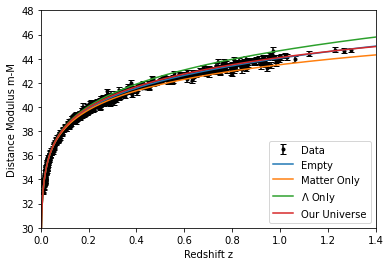

In [128]:
plt.errorbar(redshift, dis_mod,fmt='.k',yerr=df[' dmu'],capsize=3)
plt.errorbar(z_empty,dis_mod_empty)
plt.errorbar(z_matter,dis_mod_matter)
plt.errorbar(z_lamb,dis_mod_lambda)
plt.errorbar(z_us,dis_mod_us)
plt.xlim([0,1.4])
plt.ylim([30,48])
plt.legend(['Data','Empty','Matter Only',r'$\Lambda$ Only','Our Universe'])
plt.ylabel('Distance Modulus m-M')
plt.xlabel('Redshift z')
plt.savefig('HW/hw3q2p1.pdf')


In [129]:
dis_mod_residual=[]
dis_mod_matter_residual=[]
dis_mod_lambda_residual=[]
dis_mod_us_residual=[]

for i in range(len(dis_mod)):
    redindex = empuni._get_index(redshift[i],type='z')
    dis_mod_residual.append(dis_mod[i]-dis_mod_empty[redindex])

for i in range(len(dis_mod_matter)):
    redindex = empuni._get_index(z_matter[i],type='z')
    dis_mod_matter_residual.append(dis_mod_matter[i]-dis_mod_empty[redindex])

for i in range(len(dis_mod_lambda)):
    redindex = empuni._get_index(z_lamb[i],type='z')
    dis_mod_lambda_residual.append(dis_mod_lambda[i]-dis_mod_empty[redindex])

for i in range(len(dis_mod_us)):
    redindex = empuni._get_index(z_us[i],type='z')
    dis_mod_us_residual.append(dis_mod_us[i]-dis_mod_empty[redindex])



<ipython-input-129-f1f18524cf5c>:12: RuntimeWarning: invalid value encountered in double_scalars
  dis_mod_matter_residual.append(dis_mod_matter[i]-dis_mod_empty[redindex])
<ipython-input-129-f1f18524cf5c>:16: RuntimeWarning: invalid value encountered in double_scalars
  dis_mod_lambda_residual.append(dis_mod_lambda[i]-dis_mod_empty[redindex])
<ipython-input-129-f1f18524cf5c>:20: RuntimeWarning: invalid value encountered in double_scalars
  dis_mod_us_residual.append(dis_mod_us[i]-dis_mod_empty[redindex])


<ipython-input-130-ab349bcf2df3>:2: RuntimeWarning: invalid value encountered in subtract
  plt.errorbar(z_empty,dis_mod_empty-dis_mod_empty)


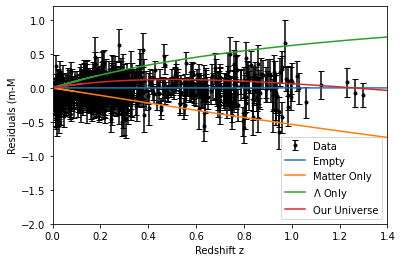

In [130]:
plt.errorbar(redshift, dis_mod_residual,fmt='.k',yerr=df[' dmu'],capsize=3)
plt.errorbar(z_empty,dis_mod_empty-dis_mod_empty)
plt.errorbar(z_matter,dis_mod_matter_residual)
plt.errorbar(z_lamb,dis_mod_lambda_residual)
plt.errorbar(z_us,dis_mod_us_residual)
plt.xlim([0,1.4])
plt.ylim([-2,1.2])
plt.legend(['Data','Empty','Matter Only',r'$\Lambda$ Only','Our Universe'])
plt.ylabel('Residuals (m-M')
plt.xlabel('Redshift z')
plt.savefig('HW/hw3q2p2.pdf')


In [143]:
#chisquare

dis_mod_residual_emp=[]
for i in range(len(dis_mod)):
    redindex = empuni._get_index(redshift[i],type='z')
    dis_mod_residual_emp.append(dis_mod[i]-dis_mod_empty[redindex])
chisquared_emp = np.sum(np.array(dis_mod_residual_emp)**2/np.array(df[' dmu'])**2)
reduced_emp = chisquared_emp/len(dis_mod_residual_emp)
print(reduced_emp)

dis_mod_residual_matt=[]
for i in range(len(dis_mod)):
    redindex = mattuni._get_index(redshift[i],type='z')
    dis_mod_residual_matt.append(dis_mod[i]-dis_mod_matter[redindex])
chisquared_matt = np.sum(np.array(dis_mod_residual_matt)**2/np.array(df[' dmu'])**2)
reduced_matt = chisquared_matt/len(dis_mod_residual_matt)
print(reduced_matt)

dis_mod_residual_lamb=[]
for i in range(len(dis_mod)):
    redindex = lambdauni._get_index(redshift[i],type='z')
    dis_mod_residual_lamb.append(dis_mod[i]-dis_mod_lambda[redindex])
chisquared_lamb = np.sum(np.array(dis_mod_residual_lamb)**2/np.array(df[' dmu'])**2)
reduced_lamb = chisquared_lamb/len(dis_mod_residual_lamb)
print(reduced_lamb)


0.980284674416366


/Users/jchung1/Desktop/Uni Works/Honours/Courseworks/ASTR6002/cosmology_calculator.py:59: RuntimeWarning: invalid value encountered in sqrt
  return -1*np.sqrt(adot2) #integration is negative since t=t0-tau so dt=-dtau


2.3613104446083075
4.305722103153736


In [144]:
dis_mod_residual_us=[]
for i in range(len(dis_mod)):
    redindex = our_universe._get_index(redshift[i],type='z')
    dis_mod_residual_us.append(dis_mod[i]-dis_mod_us[redindex])
chisquared_us = np.sum(np.array(dis_mod_residual_us)**2/np.array(df[' dmu'])**2)
reduced_us = chisquared_us/len(dis_mod_residual_us)
print(reduced_us)

/Users/jchung1/Desktop/Uni Works/Honours/Courseworks/ASTR6002/cosmology_calculator.py:59: RuntimeWarning: invalid value encountered in sqrt
  return -1*np.sqrt(adot2) #integration is negative since t=t0-tau so dt=-dtau


1.405824577994314


In [146]:
def v(z):
    c=3e8
    return c*z, c*((1+z)**2-1)/((1+z)**2+1)

In [150]:
v(-0.00055)

(-165000.0, -165045.37499314104)